<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Project - House_Price
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement

This dataset is created for the prediction of House Prices from an Indian perspective Towns. The dataset contains various features that are important during the application for the selling the Houses. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a Houses Sold.

# Data Dictionary 
 
 The Data set contains 506 observations of House Price From Different Towns. Corresponding to each house price,data of other veriables is available on which price is suspected to depend.

## About the dataset (House Pricing prediction data) 

**price:** Value of the house 

**crime_rate:** Crime rate in that neighborhood

**resid_area:** Preporsion of residential area in the town

**air_qual:** Quality of Air in that neighborhood

**room_num:** Avearge number of rooms in houses of that locality

**age:** How old is the house counstuction  in years

**dist1:** Distance from employment hub 1

**dist2:** Distance from employment hub 2

**dist3:** Distance from employment hub 3

**dist4:** Distance from employment hub 4

**teachers:** Number of Teachers per 1000 population in the town

**poor_prop:** Preportion of poor population in the town

**airport:** Is there an airport in city? (Yes/No)

**n_hos_beds:** Number of Hospital Beds per 1000 population in the town

**n_hot_rooms:** Number of Hotel rooms per 1000 population in town

**waterbody:** What type of natural fresh water sourcs is there in the city (Lake/River/Both/None)

**rainfall:** The yearly average rainfall in centimeters

**bus_ter:** Is there a bus terminal in city? (Yes/No)

**parks:** Proportion of land assigned as park and green areas in town

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Based on Boxplot](#boxplot)**
    - 2.7 - **[Based on IQR](#iqr)**
    - 2.8 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.9 - **[Scale the Data](#scale)**
    - 2.10 - **[Train-Test Split](#split)**
3. **[Linear Regression (Full Model)](#logit)**
4. **[Model Evaluation](#prep)**
    - 4.1 - **[Gradient Descent](#gd)**
    - 4.2 - **[Cross Validation (Grid Search CV)](#dtype)**
    - 4.3 - **[Lasso & Ridge](#drop)**

4. **[Result](#result)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

In [3]:
# load the csv file
# store the data in 'df_houseprice'
df_houseprice = pd.read_csv("C:/Users/abc/Desktop/Linnear Model on R/Data Files/Linear Regression Dataset/House_Price.csv")

# display first five observations using head()
df_houseprice.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.000000,0.006320,32.310000,0.538000,6.575000,65.200000,4.350000,3.810000,4.180000,4.010000,24.700000,4.980000,YES,5.480000,11.192000,River,23,YES,0.049347
1,21.600000,0.027310,37.070000,0.469000,6.421000,78.900000,4.990000,4.700000,5.120000,5.060000,22.200000,9.140000,NO,7.332000,12.172800,Lake,42,YES,0.046146
2,34.700000,0.027290,37.070000,0.469000,7.185000,61.100000,5.030000,4.860000,5.010000,4.970000,22.200000,4.030000,NO,7.394000,101.120000,None,38,YES,0.045764
3,33.400000,0.032370,32.180000,0.458000,6.998000,45.800000,6.210000,5.930000,6.160000,5.960000,21.300000,2.940000,YES,9.268000,11.267200,Lake,45,YES,0.047151
4,36.200000,0.069050,32.180000,0.458000,7.147000,54.200000,6.160000,5.860000,6.370000,5.860000,21.300000,5.330000,NO,8.824000,11.289600,Lake,55,YES,0.039474


**Let us now see the number of variables and observations in the data.**

In [4]:
# use 'shape' to check the dimension of data
df_houseprice.shape

(506, 19)

**Interpretation:** The data has 506 observations and 19 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

**Check the data type of each variable. If the data type is not as per the data definition, change the data type.**

In [5]:
# use 'dtypes' to check the data type of a variable
df_houseprice.dtypes

price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
dtype: object

**Interpretation:** The variables `price`, `crime_rate`, `resid_area`, `air_qual`, `room_num`, `age`,
    `dist1`, `dist2`, `dist3`, `dist4`, `teachers`, `poor_prop`,`n_hos_beds`, `n_hot_rooms`, `rainfall`,`parks` are numerical.

From the above output, we see that the data type of `bus_ter`,`waterbody`, `airport` are the 'Catagorical'.

And all veriables in Correct Datatypes

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

**Check Which Veriable is no signifiant in analysis**

In [6]:
# First Check Catagorical Columns
df_cat = df_houseprice.select_dtypes(include=[np.object])
df_cat.head()

,airport,waterbody,bus_ter
0,YES,River,YES
1,NO,Lake,YES
2,NO,None,YES
3,YES,Lake,YES
4,NO,Lake,YES


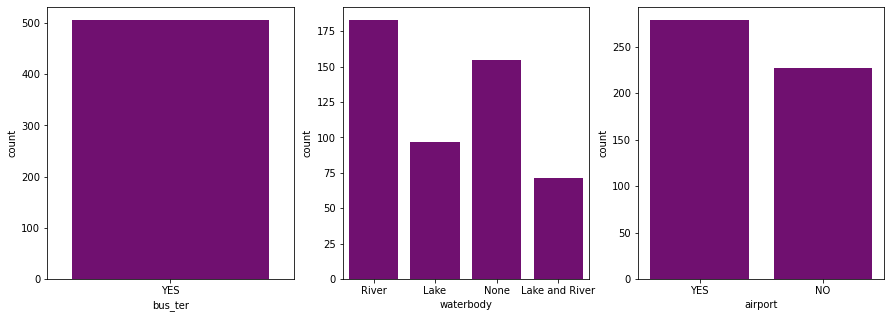

In [7]:
# Plot Subplots to Descover the Catagorical Veriables
fig,axes = plt.subplots(1,3,figsize = (15,5))
sns.countplot(df_cat.bus_ter,color = "purple",ax = axes[0])
sns.countplot(df_cat.waterbody,color = "purple",ax = axes[1])
sns.countplot(df_cat.airport,color = "purple",ax = axes[2])
plt.show()

In [8]:
# So as we see here Bus_ter column have only one unique value that means it wont usefull for our analysis
# Axis  = 1  use for column 0 for row
# inplace = True indecate permanat changes
df_houseprice.drop("bus_ter",axis =1,inplace = True)

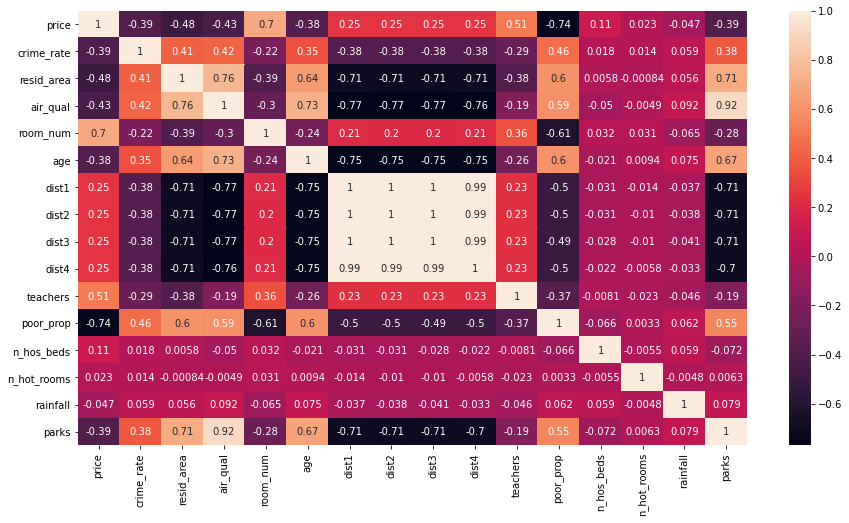

In [9]:
sns.heatmap(df_houseprice.corr(),annot = True)
plt.show()

**Interpretation:** The column `bus_ter` contains the serial number of the student, which is redundant for further analysis, Thus, we drop the column.
other than this we cant find any column to be unusable for our analysis.

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

**Interpretation:** The above plot indicates that all the variables are not that much but slight normally distributed.

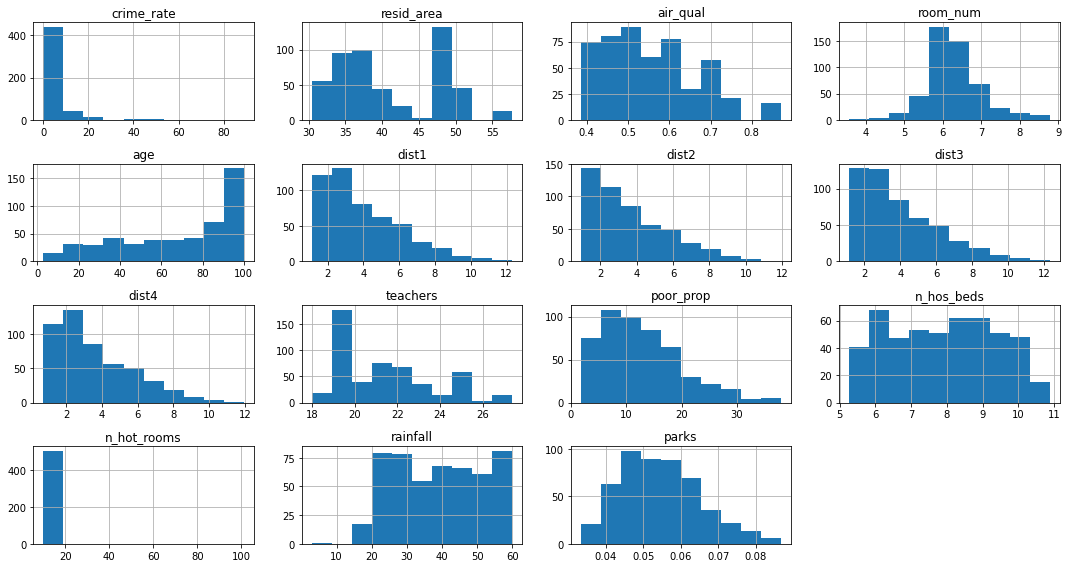

Skewness:


crime_rate     5.223149
resid_area     0.295022
air_qual       0.729308
room_num       0.403612
age           -0.598963
dist1          1.010577
dist2          1.007492
dist3          1.003848
dist4          1.004680
teachers       0.802325
poor_prop      0.906460
n_hos_beds    -0.009176
n_hot_rooms   13.790552
rainfall       0.012971
parks          0.533991
dtype: float64

In [10]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_houseprice.drop('price', axis = 1).hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_houseprice.drop('price', axis = 1).skew()

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [11]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_houseprice.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_houseprice.isnull().sum()*100/df_houseprice.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
n_hos_beds,8,1.581028
parks,0,0.000000
dist2,0,0.000000
crime_rate,0,0.000000
resid_area,0,0.000000
air_qual,0,0.000000
room_num,0,0.000000
age,0,0.000000
dist1,0,0.000000
dist3,0,0.000000


So as wee see in `n_hos_beds` contain `8` missing values and the percentage of missing value is `1.581028 %` that meanse its small amout of data so we can replace it with average of that veriable

In [12]:
df_houseprice.fillna(df_houseprice["n_hos_beds"].mean(),inplace=True)

In [13]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_houseprice.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_houseprice.isnull().sum()*100/df_houseprice.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
parks,0,0.000000
rainfall,0,0.000000
crime_rate,0,0.000000
resid_area,0,0.000000
air_qual,0,0.000000
room_num,0,0.000000
age,0,0.000000
dist1,0,0.000000
dist2,0,0.000000
dist3,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="boxplot"></a>
## 2.6 Based on Boxplots:

The boxplot() in seaborn plots a box plot of the specified data. The box represents the quartiles of the data while the whiskers extend to show the rest of the distribution. The points that are determined to be outliers are identified using  the interquartile range (IQR) method.

The next section deals with IQR method.

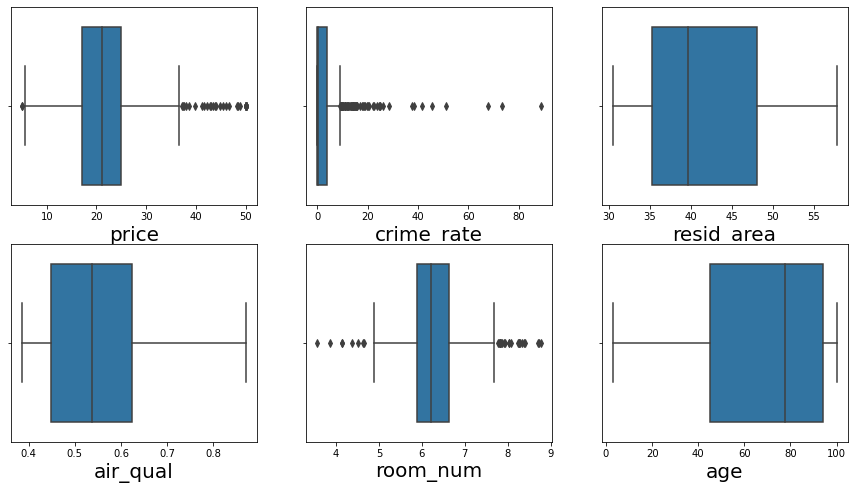

In [14]:
df_num = df_houseprice.select_dtypes(include=[np.number])
# Now Check Numirical Veriables
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

**Interpretation:** Out of the six numeric variables, variables `room_num`, `crime rate` and `price` have outliers.

<a id="iqr"></a>
## 2.7 Based on IQR

The IQR method can be used when the data distribution in non-normal. Also the quartiles are less affected by the extreme values.

In [15]:
# obtain the first quartile
Q1 = df_num.room_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.room_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)
df_num = df_num[~((df_num.room_num < (Q1 - 1.5 * IQR)) |(df_num.room_num > (Q3 + 1.5 * IQR)))]

0.7379999999999995


In [16]:
# obtain the first quartile
Q1 = df_num.price.quantile(0.25)

# obtain the third quartile
Q3 = df_num.price.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)
df_num = df_num[~((df_num.price < (Q1 - 1.5 * IQR)) |(df_num.price > (Q3 + 1.5 * IQR)))]

7.724999999999998


In order to check, whether the outliers are removed, let us first check the shape of the data.

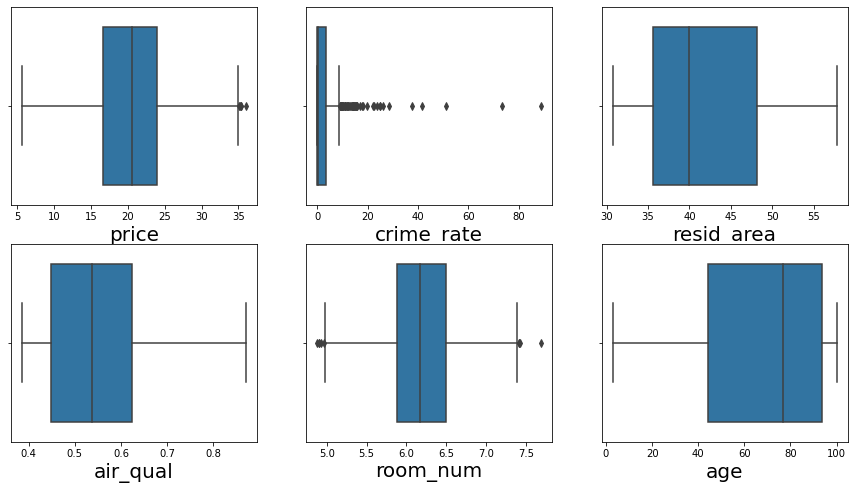

In [17]:
# Now Check Numirical Veriables
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

<a id="dummy"></a>
## 2.8 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [18]:
# store the target variable 'Chance of Admit' in a dataframe 'df_target'
df_target = df_houseprice['price']

# store all the independent variables in a dataframe 'df_feature'
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df_houseprice.drop('price', axis = 1)

#### Filter numerical and categorical variables.

In [19]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
0,0.006320,32.310000,0.538000,6.575000,65.200000,4.350000,3.810000,4.180000,4.010000,24.700000,4.980000,5.480000,11.192000,23,0.049347
1,0.027310,37.070000,0.469000,6.421000,78.900000,4.990000,4.700000,5.120000,5.060000,22.200000,9.140000,7.332000,12.172800,42,0.046146
2,0.027290,37.070000,0.469000,7.185000,61.100000,5.030000,4.860000,5.010000,4.970000,22.200000,4.030000,7.394000,101.120000,38,0.045764
3,0.032370,32.180000,0.458000,6.998000,45.800000,6.210000,5.930000,6.160000,5.960000,21.300000,2.940000,9.268000,11.267200,45,0.047151
4,0.069050,32.180000,0.458000,7.147000,54.200000,6.160000,5.860000,6.370000,5.860000,21.300000,5.330000,8.824000,11.289600,55,0.039474


In [20]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['airport', 'waterbody'], dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [21]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

<a id="scale"></a>
## 2.9 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [22]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [23]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,-0.419782,-1.287909,-0.144217,0.413672,-0.120013,0.179451,0.086032,0.103569,0.186459,1.459000,-1.075562,-1.653421,-0.353398,-1.294408,-0.480763,1,0,0,1
1,-0.417339,-0.593381,-0.740262,0.194274,0.367166,0.483280,0.508534,0.547446,0.687144,0.303094,-0.492439,-0.387954,-0.166000,0.225431,-0.782183,0,0,0,0
2,-0.417342,-0.593381,-0.740262,1.282714,-0.265812,0.502269,0.584490,0.495503,0.644228,0.303094,-1.208727,-0.345589,16.828839,-0.094535,-0.818115,0,0,1,0
3,-0.416750,-1.306878,-0.835284,1.016303,-0.809889,1.062454,1.092442,1.038545,1.116302,-0.113032,-1.361517,0.934910,-0.339029,0.465405,-0.687571,1,0,0,0
4,-0.412482,-1.306878,-0.835284,1.228577,-0.511180,1.038717,1.059212,1.137709,1.068618,-0.113032,-1.026501,0.631526,-0.334750,1.265320,-1.410280,0,0,0,0


<a id="split"></a>
## 2.10 Train-Test Split

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [24]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (404, 20)
y_train (404,)
X_test (102, 20)
y_test (102,)


#### Create a generalized function to create a dataframe containing the scores for the models.

<a id="logit"></a>
# 3. Linear Regression (Full Model)

#### Build a full logistic model on a training dataset.

In [25]:
## Logistic Regression Full Model
from statsmodels.api import OLS
model = OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     52.22
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           6.09e-94
Time:                        22:19:03   Log-Likelihood:                -1192.7
No. Observations:                 404   AIC:                             2425.
Df Residuals:                     384   BIC:                             2505.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       22.6825      0.616     36.808      0.000      21.471      23.894
crime_rate                  -0.8105      0.260     -3.122      0.002      -1.321      -0.300
resid_area                  -0.5583      0.426     -1.312      0.190      -1.395       0.279
air_qual                    -1.7711      0.714     -2.480      0.014      -3.175      -0.367
room_num                     2.4379      0.325      7.505      0.000       1.799       3.077
age                          0.2379      0.433      0.549      0.583      -0.614       1.089
dist1                        5.1966      4.416      1.177      0.240      -3.485      13.879
dist2                       -1.6058      4.576     -0.351      0.726     -10.603       7.392
dist3                       -5.4022      4.475     -1.207      0.228     -14.201       3.397
dist4                       -0.6328      2.341     -0.270      0.787      -5.235       3.970
teachers                     1.8933      0.280      6.754      0.000       1.342       2.444
poor_prop                   -4.3007      0.398    -10.795      0.000      -5.084      -3.517
n_hos_beds                   0.3164      0.250      1.268      0.206      -0.174       0.807
n_hot_rooms                  0.2397      0.218      1.102      0.271      -0.188       0.667
rainfall                     0.0779      0.244      0.319      0.750      -0.402       0.558
parks                        0.1927      0.594      0.325      0.746      -0.975       1.360
airport_YES                  0.6689      0.494      1.355      0.176      -0.301       1.639
waterbody_Lake and River    -0.5979      0.847     -0.706      0.481      -2.264       1.068
waterbody_None              -0.8699      0.695     -1.252      0.211      -2.236       0.497
waterbody_River             -0.7742      0.687     -1.128      0.260      -2.124       0.576
==============================================================================
Omnibus:                      168.577   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              846.188
Skew:                           1.748   Prob(JB):                    1.79e-184
Kurtosis:                       9.168   Cond. No.                         65.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

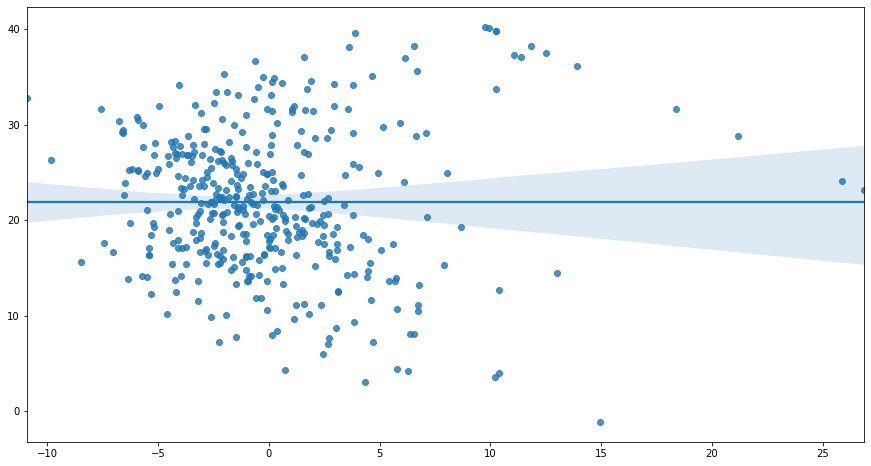

In [26]:
sns.regplot(model.resid, model.predict(X_train))
plt.show()

<a id="gd"> </a>
## Gradient Descent

In [27]:
from sklearn.linear_model import SGDRegressor, LinearRegression

lr = LinearRegression()
sgd = SGDRegressor()

In [28]:
# SGD RMSE:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, sgd.fit(X_train, y_train).predict(X_test)))

5.616664678832205

In [29]:
# LR RMSE:
np.sqrt(mean_squared_error(y_test, lr.fit(X_train, y_train).predict(X_test)))

5.707076971529823

In [30]:
sgd_pred = sgd.fit(X_train, y_train).predict(X_test)
lr_pred = lr.fit(X_train, y_train).predict(X_test)

<a id="dtype"> </a>
## 4.2 Cross Validation (Grid Search CV)

In [31]:
# Applying grid search to find the best alpha value for the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 0.0001, max_iter = 10000)


parameters = [{'alpha':[0.00001, 0.001, 0.99, 0.1, 0.05, 0.005, 0.722, 1, 2]}]

# parameters = [{'alpha':[0.00001, 0.001, 0.99, 0.1, 0.05, 0.005, 0.722, 1, 2],
#               'criterion': ['gini', 'entropy']}]

grid = GridSearchCV(estimator = enet, param_grid=parameters, cv = 10)
grid.fit(X_train, y_train)

# Grid Search will see which alpha returns the highest R2 and lowest combination of RMSE.
# That will be the ideal alpha value returned by grid

GridSearchCV(cv=10, estimator=ElasticNet(alpha=0.0001, max_iter=10000),
             param_grid=[{'alpha': [1e-05, 0.001, 0.99, 0.1, 0.05, 0.005, 0.722,
                                    1, 2]}])

In [32]:
from sklearn.metrics import r2_score
enet = ElasticNet(alpha = 1e-05, max_iter = 10000)

pred = enet.fit(X_train, y_train).predict(X_train)
pred_test = enet.fit(X_train, y_train).predict(X_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

RMSE Train: 4.633365516509592
RMSE Test: 5.7067542117631245
r2 train:  0.7209749259352034
r2 test:  0.6864798409517008


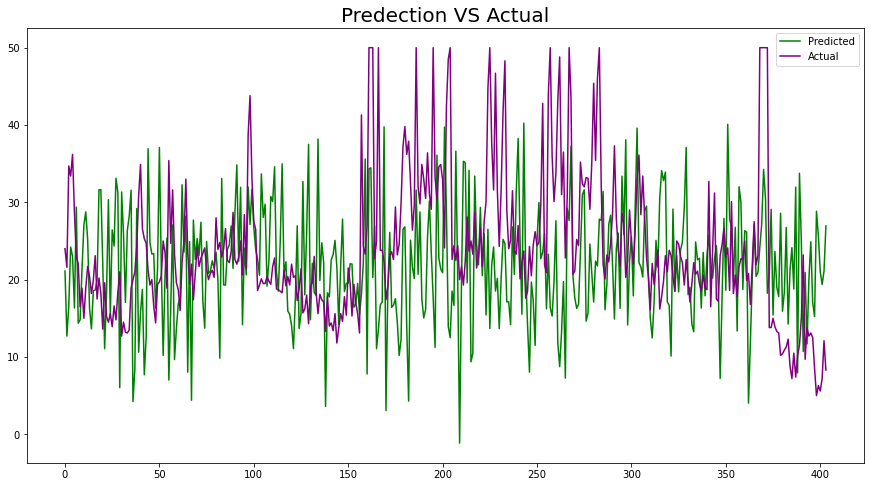

In [33]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] = df_houseprice.price.copy()
result_linear.head()
# Plot The Result
result_linear.Predicted.plot(kind = "line",color = "g")
result_linear.Actual.plot(kind = "line",color = 'purple')
plt.legend()

plt.title("Predection VS Actual",fontsize = 20)

plt.show()

<a id="drop"> </a>
## 4.3 Lasso and Ridge

In [34]:
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV

lasso = Lasso(alpha = 0.5, normalize = True, max_iter = 100000)

pred = lasso.fit(X_train, y_train).predict(X_train)
pred_test = lasso.fit(X_train, y_train).predict(X_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

RMSE Train: 8.771521780240931
RMSE Test: 10.719726865852659
r2 train:  0.0
r2 test:  -0.10625328788203747


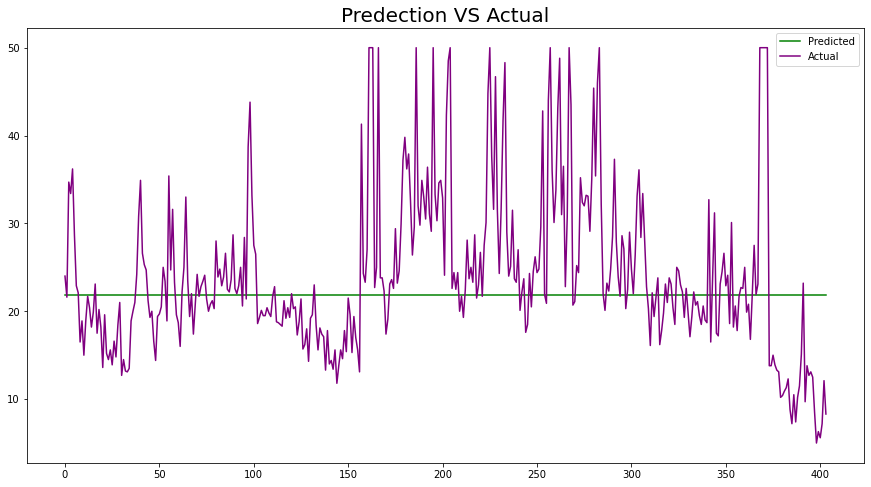

In [35]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] = df_houseprice.price.copy()
result_linear.head()
# Plot The Result
result_linear.Predicted.plot(kind = "line",color = "g")
result_linear.Actual.plot(kind = "line",color = 'purple')
plt.legend()

plt.title("Predection VS Actual",fontsize = 20)

plt.show()

In [36]:
parameters = [{'alpha' : [0.1, 2, 50, 0, 7,8,9,10,11]}]

grid = GridSearchCV(estimator = lasso, param_grid = parameters, cv = 10)

grid.fit(X_train, y_train)

print(grid.best_params_) # alpha = 0.1

{'alpha': 0}


In [37]:
ridge = Ridge(alpha=0.001, normalize=True)
pred = ridge.fit(X_train, y_train).predict(X_train)
pred_test = ridge.fit(X_train, y_train).predict(X_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

RMSE Train: 4.634779063539083
RMSE Test: 5.673508989775047
r2 train:  0.720804650040819
r2 test:  0.6901220819485728


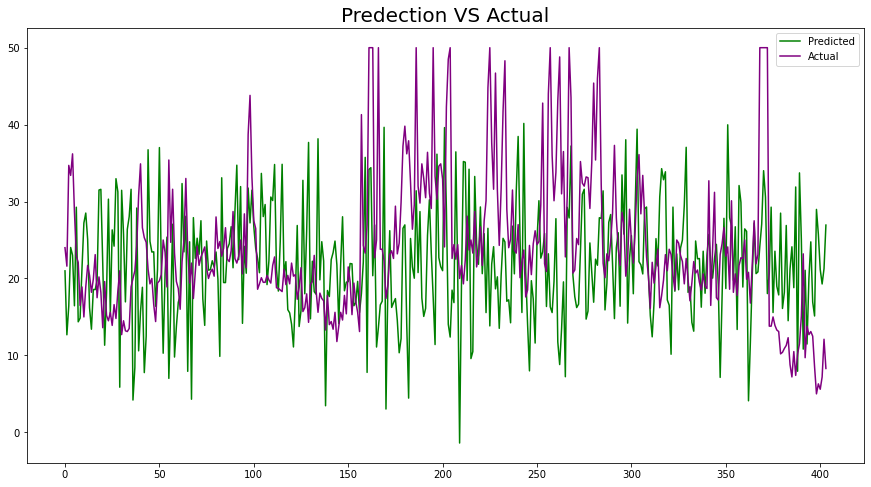

In [38]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] = df_houseprice.price.copy()
result_linear.head()
# Plot The Result
result_linear.Predicted.plot(kind = "line",color = "g")
result_linear.Actual.plot(kind = "line",color = 'purple')
plt.legend()

plt.title("Predection VS Actual",fontsize = 20)

plt.show()

In [39]:
parameters = [{'alpha' : [0.1, 2, 50, 0, 7,8,9,10,11]}]

grid = GridSearchCV(estimator = ridge, param_grid = parameters, cv = 10)

grid.fit(X_train, y_train)

print(grid.best_params_) # alpha = 0.1

{'alpha': 0.1}


In [40]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.9, normalize = True)

pred = enet.fit(X_train, y_train).predict(X_train)
pred_test = enet.fit(X_train, y_train).predict(X_test)

print("RMSE Train:", np.sqrt(mean_squared_error(y_train, pred)))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, pred_test)))
print("r2 train: ",r2_score(y_train, pred))
print("r2 test: ",r2_score(y_test, pred_test))

RMSE Train: 7.312133385634902
RMSE Test: 9.12893357266189
r2 train:  0.3050743884588293
r2 test:  0.19771766728760198


In [41]:
# Find at Which alpha is good fitted to our model
parameters = [{'alpha' : [0.1,0.5,1,1.5,2,2.5,3,3.5,4], 
              'l1_ratio' : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] }]

grid = GridSearchCV(estimator = enet, param_grid = parameters, cv = 10)

grid.fit(X_train, y_train)
print(grid.best_params_)

{'alpha': 0.1, 'l1_ratio': 0.9}


<a id="drop"> </a>
# 5. Result

In [42]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] = df_houseprice.price.copy()
result_linear.head()

,Predicted,Actual
0,22.639361,24.000000
1,18.634708,21.600000
2,20.726554,34.700000
3,22.414835,33.400000
4,21.779835,36.200000


In [43]:
# Find the Acuracy (Find by Which difference w.r.m the predicted values are vary)
Accuracy = result_linear.Predicted.mean() - result_linear.Actual.mean()
print("Accuracy",Accuracy)
print("mean of predection",result_linear.Predicted.mean())
print("mean of Acuals",result_linear.Actual.mean())

Accuracy -2.3054455445545052
mean of predection 21.859158415841563
mean of Acuals 24.164603960396068


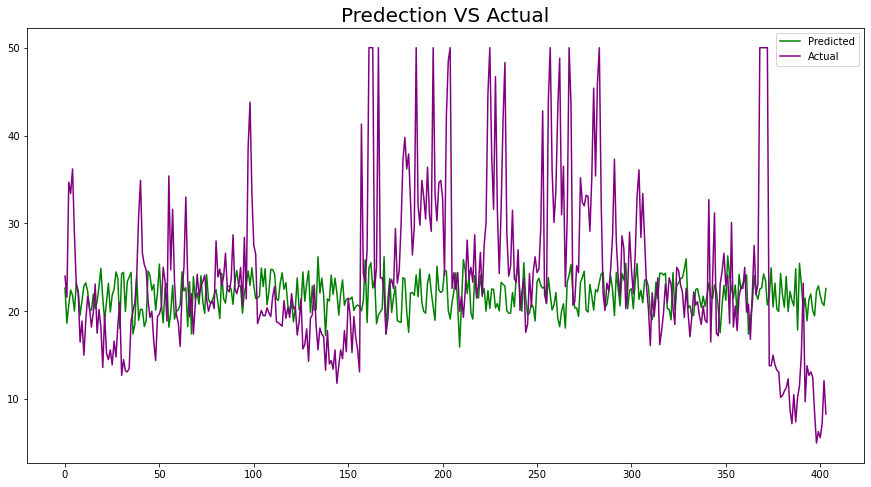

In [45]:
# By using Predicted and Actual make a Dataframe
column = ["Predicted"]
result_linear = pd.DataFrame(pred,columns= column)
result_linear["Actual"] = df_houseprice.price.copy()
result_linear.head()
# Plot The Result
result_linear.Predicted.plot(kind = "line",color = "g")
result_linear.Actual.plot(kind = "line",color = 'purple')
plt.legend()

plt.title("Predection VS Actual",fontsize = 20)

plt.show()

**Conclusion :-** 
    As we see In the linear model it wont perform good because error that we see in plot is so high but at lasso and ridge it little bit better so now this project is closed to accurecy but definatly will come with other solution on the data set and that may predict verry well with less error rate

<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Linear Regression (End) <End>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## "END" New learning Begins lets explore other model ad see what are there Responces